In [5]:
PATH = "./data/wood-defects-parsed/images/val/103500057.jpg"

from PIL import Image







Image ID: 112800038

Defects:

Class: knot_with_crack
Bounding box:
  x: 1116, y: 75, w: 224, h: 83

Image ID: 106600022

Defects:

Class: live_knot
Bounding box:
  x: 146, y: 59, w: 727, h: 341

Image ID: 101600027

Defects:
No defects detected


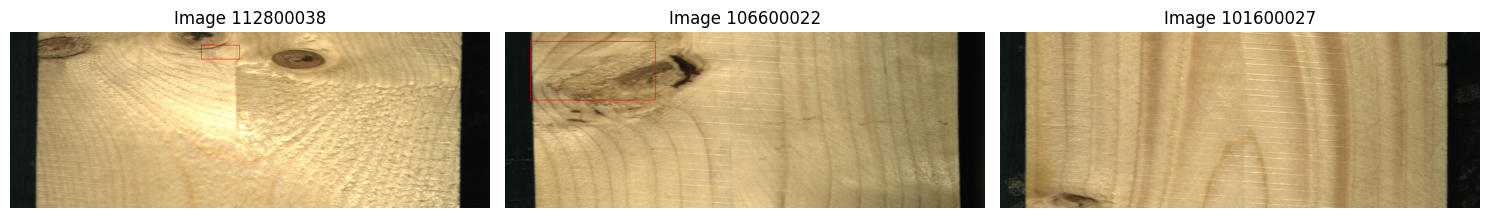

In [12]:
# Load and display 3 test images
qwen_inference_result = [{"img_id": "112800038", "output": ["```json\n[\n\t{\"class_id\": \"knot_with_crack\", \"bounding_box\": {\"x1\": 1116, \"y1\": 75, \"x2\": 1340, \"y2\": 158}}\n]\n```"]}, {"img_id": "106600022", "output": ["```json\n[\n\t{\"class_id\": \"live_knot\", \"bounding_box\": {\"x1\": 146, \"y1\": 59, \"x2\": 873, \"y2\": 400}}\n]\n```"]}, {"img_id": "101600027", "output": ["```json\n[]\n```"]}]

from PIL import Image, ImageDraw
import json
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, result in enumerate(qwen_inference_result):
    img_id = result["img_id"]
    # Construct image path
    # Try test split first, then train, then val
    try:
        img_path = f"./data/wood-defects-parsed/images/test/{img_id}.jpg"
        img = Image.open(img_path)
    except FileNotFoundError:
        try:
            img_path = f"./data/wood-defects-parsed/images/train/{img_id}.jpg"
            img = Image.open(img_path)
        except FileNotFoundError:
            img_path = f"./data/wood-defects-parsed/images/val/{img_id}.jpg"
            img = Image.open(img_path)
    
    # Load image and create drawing context
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    
    print(f"\nImage ID: {img_id}")
    print("\nDefects:")
    # Parse the output JSON from the inference result
    defects = json.loads(result["output"][0].strip("```json\n```"))
    
    if defects:  # If there are any defects
        for defect in defects:
            print(f"\nClass: {defect['class_id']}")
            print("Bounding box:")
            # Get coordinates from the dictionary format
            bbox = defect['bounding_box']
            x1, y1 = bbox['x1'], bbox['y1']
            x2, y2 = bbox['x2'], bbox['y2']
            # Calculate width and height
            w = x2 - x1
            h = y2 - y1
            print(f"  x: {x1}, y: {y1}, w: {w}, h: {h}")
            
            # Draw rectangle
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
            # Add label
            draw.text((x1, y1-10), defect['class_id'], fill="red")
    else:
        print("No defects detected")
    
    # Display the image in the corresponding subplot
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f"Image {img_id}")

plt.tight_layout()
plt.show()
